In [17]:
import pandas as pd
import yfinance as yf
df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600
...,...,...,...,...,...,...,...
11024,2024-09-06,223.949997,225.240005,219.770004,220.820007,220.820007,48423000
11025,2024-09-09,220.820007,221.270004,216.710007,220.910004,220.910004,67180000
11026,2024-09-10,218.919998,221.479996,216.729996,220.110001,220.110001,51591000
11027,2024-09-11,221.460007,223.089996,217.889999,222.660004,222.660004,44587100


In [18]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862
...,...,...
11024,2024-09-06,220.820007
11025,2024-09-09,220.910004
11026,2024-09-10,220.110001
11027,2024-09-11,222.660004


In [ ]:
df['Date']

In [20]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)
datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [21]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\fafaf\AppData\Local\Temp\ipykernel_47860\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0       1980-12-12
1       1980-12-15
2       1980-12-16
3       1980-12-17
4       1980-12-18
           ...    
11024   2024-09-06
11025   2024-09-09
11026   2024-09-10
11027   2024-09-11
11028   2024-09-12
Name: Date, Length: 11029, dtype: datetime64[ns]

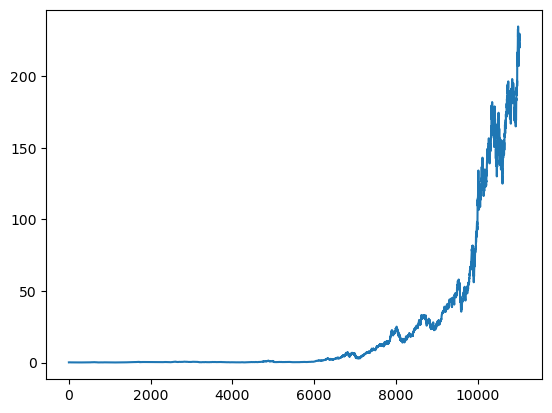

In [22]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])